In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

In [19]:
# Read the online wine data set with no headers
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Assign column labels
# The feature names can be found online.
df_wine.columns = ['Class label', 
              'Alcohol', 
              'Malic acid', 
              'Ash', 
              'Alcalinity of ash', 
              'Magnesium', 
              'Total phenols', 
              'Flavanoids', 
              'Nonflavanoid phenols', 
              'Proanthocyanins', 
              'Color intensity', 
              'Hue', 
              'OD280/OD315 of diluted wines', 
              'Proline']

In [20]:
# There are three class labels
df_wine['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [21]:
# We only consider label 2 and 3, so we drop the examples from class 1
df_wine = df_wine[df_wine['Class label']!=1]

In [22]:
# Extract features and class labels
# We only use two features
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values
y = df_wine['Class label'].values

In [23]:
# Relabeling data
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [25]:
# Create a bagging estimator
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)
# max_depth=None: no depth restriction



bag = BaggingClassifier(base_estimator=tree, 
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        random_state=1, n_jobs=1)
# n_estimators=500: 500 base estimators (decision trees) in the ensemble.
# max_samples=1.0: max_samples * X.shape[0] samples
# max_features=1.0: max(1, int(max_features * n_features_in_)) features
# bootstrap=True: draw samples with replacement
# bootstrap_features=False: do not sample features with replacement

In [26]:
# Fit a single tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [27]:
# Show accuracy of the fitted tree on both the training and testing data
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

accuracy_score_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_score_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Accuracy for the training set: {accuracy_score_train:.2f}')
print(f'Accuracy for the test set: {accuracy_score_test:.2f}')

Accuracy for the training set: 1.00
Accuracy for the test set: 0.83


In [28]:
# Fit the bagged model
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, n_jobs=1, random_state=1)

In [29]:
# Show accuracy of the fitted bagging estimator on both the training and testing data
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

accuracy_score_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_score_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Accuracy for the training set: {accuracy_score_train:.2f}')
print(f'Accuracy for the test set: {accuracy_score_test:.2f}')

Accuracy for the training set: 1.00
Accuracy for the test set: 0.92


Text(16, -0.5, 'Alcohol')

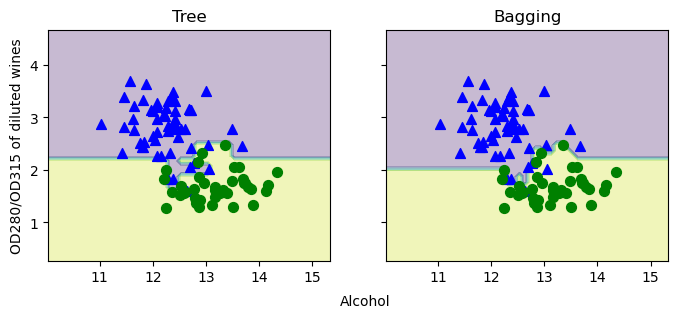

In [30]:
# Plot decision regions
# These codes are similar to those in Ch7_EnsembleLearning_MajorityVote
x_min = X_train[:,0].min() - 1 # x_min: min of the first feature - 1
x_max = X_train[:,0].max() + 1 # x_max: max of the first feature + 1

y_min = X_train[:,1].min() - 1 # y_min: min of the second feature - 1
y_max = X_train[:,1].max() + 1 # y_max: max of the second feature + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))

for idx, clf, tt in zip([0,1], [tree, bag], ['Tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3) # Plot decision regions
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='blue', marker='^', s=50) #s: marker size in points**2
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='green', marker='o', s=50)
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('OD280/OD315 of diluted wines')
axarr[0].text(16, -0.5, 'Alcohol', ha='center', va='center') # ha, va: horizontal and verticle alignment of the text

## AdaBoost

In [31]:
# Create a tree stump
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

In [32]:
# Fit a single tree
tree.fit(X_train, y_train)

# Show accuracy of the fitted tree on both the training and testing data
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

accuracy_score_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_score_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Accuracy for the training set: {accuracy_score_train:.2f}')
print(f'Accuracy for the test set: {accuracy_score_test:.2f}')

Accuracy for the training set: 0.92
Accuracy for the test set: 0.88


In [33]:
# Train the AdaBoost classifier
ada = ada.fit(X_train, y_train)
# Show accuracy 
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

accuracy_score_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_score_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Accuracy for the training set: {accuracy_score_train:.2f}')
print(f'Accuracy for the test set: {accuracy_score_test:.2f}')

Accuracy for the training set: 1.00
Accuracy for the test set: 0.92


Text(16, -0.5, 'Alcohol')

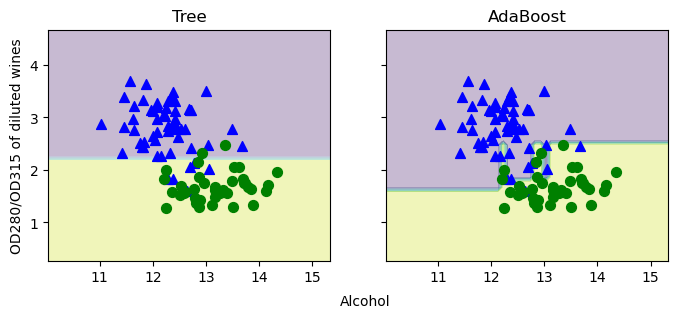

In [34]:
# Plot decision regions
# These codes are similar to those in Ch7_EnsembleLearning_MajorityVote
x_min = X_train[:,0].min() - 1 # x_min: min of the first feature - 1
x_max = X_train[:,0].max() + 1 # x_max: max of the first feature + 1

y_min = X_train[:,1].min() - 1 # y_min: min of the second feature - 1
y_max = X_train[:,1].max() + 1 # y_max: max of the second feature + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8,3))

for idx, clf, tt in zip([0,1], [tree, ada], ['Tree', 'AdaBoost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3) # Plot decision regions
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='blue', marker='^', s=50) #s: marker size in points**2
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='green', marker='o', s=50)
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('OD280/OD315 of diluted wines')
axarr[0].text(16, -0.5, 'Alcohol', ha='center', va='center') # ha, va: horizontal and verticle alignment of the text

## XGBoost

In [37]:
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.01, max_depth=4, 
                                   random_state=1)

In [38]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [39]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

accuracy_score_train_xgb = accuracy_score(y_true=y_train, y_pred=y_train_pred)
accuracy_score_test_xgb = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Accuracy for the training set: {accuracy_score_train:.2f}')
print(f'Accuracy for the test set: {accuracy_score_test:.2f}')

Accuracy for the training set: 1.00
Accuracy for the test set: 0.92
